#### What is NLP, Why it is Important
    - NLP, or Natural Language Processing, is a branch of artificial intelligence that focuses on enabling computers 
      to understand, interpret, and generate human language. The ultimate goal of NLP is to fill the gap between 
      human communication and computer understanding, allowing machines to interact with people in a way that is both
      meaningful and natural.
    - It helps developers organize knowledge for performing tasks such as translation, automatic summarization, named 
      entity recognition, speech recognition, relation extraction, and topic segmentation. These are applications of NLP.
    - Why it is Important :- NLP can analyze large volumes of text data, helping businesses gain insights from customer 
                             reviews, social media posts, or articles.
                           - Voice assistants like Siri or Google Assistant understand and respond to spoken commands, 
                             making it easy for users to interact with their devices using natural language.
                           - Translation apps use NLP to convert text from one language to another, facilitating 
                             communication between people who speak different languages.
                           - Chatbots on websites or messaging apps use NLP to understand user queries and provide 
                             information or assistance, enhancing customer support.
                           - Companies use NLP to analyze customer feedback and reviews to understand the sentiment 
                             around their products or services.
                           - NLP algorithms can summarize lengthy articles or documents, providing users with relevant 
                             information. 
                           - NLP can identify relationships between entities in text, helping to understand connections 
                             and associations in large datasets.

# Problem Statement
    - Fake news Classification with Help of Natural Language Processing Technique(so what happend now a dayes, every news 
      that  we consume is not a real, if we listen to a fake news it means your collecting a wrong information, which can
      affect the society bcause a person use or thoughts can change after consumig the fake news, we consume news through
      several mediums in our daily routeen but sometimes it becomes difficult to decide which one is real or which one is
      fake news, to overcome this problem, i tried and created one Model, through this model i can find weather it is fake 
      or real news)

#### Project Flow :-                                                            
    1) Problem Statement                                                         
    2) Data Gathering                                                                  
    3) Data PreProcessing : Here we perform some operations on data that we have                                              
        A. Tokenization                                                               
        B. Lower Case                                                                    
        C. Stopwords                                                                                         
        D. Lemmatization/ Stemming                                                                                   
    4) Vectorization(to convert words into vectors) :                                                                 
        A. Bag Of Words(CountVectorizer)                                                                         
        B. TF-IDF                                                                                                     
    5) Model Building :                                                                                     
        A. Model Oject Initialization                                                                                 
        B. Train and Test Model                                                                                        
    6) Model Evaluation :                                                                                          
        A. Accuracy Score                                                                                       
        B. Confusion Matrix                                                                                  
        C. Classification Report                                                                                       
    7) Model Deployment                                                                                                  
    8) Prediction on Client Data                                                                                

In [5]:
# required Librarys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Data Gathering

In [6]:
df=pd.read_csv(r"C:\Users\Hari\Documents\Projects\WELFake_Dataset.csv")
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


# 2. Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [8]:
df.label.value_counts()

1    37106
0    35028
Name: label, dtype: int64

The data is Equally distributed

In [9]:
df.shape

(72134, 4)

In [10]:
df.isna().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [14]:
df.shape

(71537, 4)

In [15]:
df.label.value_counts()

1    36509
0    35028
Name: label, dtype: int64

In [16]:
df=df.reset_index()

In [17]:
df.head()

,index,Unnamed: 0,title,text,label
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
2,3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
3,4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
4,5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


Here im working on Title Column, so i require only title and lable columns Actually what happend if we see text it have more elements, the processing it will take so much time, so that im performing analysis on Title column

In [18]:
df.title[0]

'LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]'

In [19]:
df.text[0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [20]:
df.columns

Index(['index', 'Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [21]:
df.drop(['Unnamed: 0','text'],axis=1,inplace=True)

In [22]:
df.columns

Index(['index', 'title', 'label'], dtype='object')

In [23]:
df.head()

,index,title,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
2,3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
3,4,SATAN 2: Russia unvelis an image of its terrif...,1
4,5,About Time! Christian Group Sues Amazon and SP...,1


# 3. Data PreProcessing

## 1.Tokenization
    Types :- word tokenization, sentence tokenization and Whitespace Tokenization

In [25]:
# here we are using Word tokenization, it is mainly used to breaking the sentances into separate the words or tokens
sample_data = 'The quick brown fox jumps over the lazy dog'
sample_data = sample_data.split()
sample_data

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

### 2. Make Lowercase

In [27]:
# to treet all words are similar/ to give similar mportance/ weight to the word, we will perform this operation 
sample_data = [data.lower() for data in sample_data]
sample_data

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

### 3. Remove Stopwords

In [28]:
# to remove normal words into the list we will perform this operation, basically stop words not give much 
# information to the model to predict something/ for redusing some noice from the Text.
stopwords = stopwords.words('english')
print(stopwords[0:10])
print(len(stopwords))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
179


In [29]:
sample_data = [data for data in sample_data if data not in stopwords]
print(sample_data)
len(sample_data)

['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


6

### 4. Stemming
    - stemming in NLP is a process of reducing words to their base or root form by removing suffixes, which helps in
      simplifying and grouping words with similar meanings.
    - In natural language processing (NLP), stemming is a text normalization technique that involves reducing words to
      their base or root form, usually by removing suffixes. The purpose of stemming is to group words with similar 
      meanings together, even if they are not identical.
    - EX :- * Original Words:jump, jumps, jumped, jumping
            * Stemmed Words (using a simple stemmer): jump

In [31]:
# it will give base word to analysis the text 
ps = PorterStemmer()
sample_data_stemming = [ps.stem(data) for data in sample_data]
print(sample_data_stemming)

['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']


### 5. Lemmatization
    - lemmatization is a valuable process in NLP for transforming words to their base forms with meaningfull word, 
      promoting consistency and accuracy in language processing tasks.

In [32]:
lm = WordNetLemmatizer()
sample_data_lemma = [lm.lemmatize(data) for data in sample_data]
print(sample_data_lemma)

['quick', 'brown', 'fox', 'jump', 'lazy', 'dog']


#### when to use what :-
    - Stemming:
        - Use Case: Stemming is often used when the focus is on simplicity and speed. It involves removing prefixes 
          or suffixes from words to get to the word stem.
        - Example Context: In a chatting application's name suggestion feature, where quick and efficient suggestions 
          are crucial, stemming might be preferred.
    - Lemmatization:
        - Use Case: Lemmatization is used when the goal is to obtain meaningful words by reducing them to their base 
          or root form (lemma).
        - Example Context: In voice or language applications, where the emphasis is on providing meaningful suggestions
          or understanding user input accurately, lemmatization might be more suitable.
    * To elaborate further:
    - Stemming Example (in a chatting application):
        - Original: "running"
        - Stem: "run"
    - Lemmatization Example (in voice or language applications):
        - Original: "better" (adjective)
        - Lemma: "good"
    - In summary, the choice between stemming and lemmatization depends on the specific requirements of the application.
      Stemming is often chosen for its simplicity and speed, while lemmatization is preferred when maintaining the meaning
      of words is crucial, such as in language understanding tasks.
    - if spped is focused then we will use Stemming ex :- in chatting application name suggestion 
    - if we want meaningfull word then we will use Lemmatization :- if voice or language applications we use Lemmatization

In [33]:
lm = WordNetLemmatizer()
corpus = []             #Initialize an empty list to store processed text
for i in range (len(df)): # Iterate through each row in the DataFrame 'df'
    review = re.sub('^a-zA-Z0-9',' ', df['title'][i])  # Remove non-alphabetic and non-numeric characters, leaving only alphabets and numbers, This step removes unwanted characters.
    review = review.lower()                            # Convert the text to lowercase
    review = review.split()                            # Split the text into a list of words
    review = [lm.lemmatize(x) for x in review if x not in stopwords] # Lemmatize each word using the WordNetLemmatizer, and remove stopwords
    review = " ".join(review)                           # Join the lemmatized words back into a single string
    corpus.append(review)                              #  Append the processed text to the 'corpus' list

In [34]:
corpus

['law enforcement high alert following threat cop white 9-11by #blacklivesmatter #fyf911 terrorist [video]',
 'unbelievable! obama’s attorney general say charlotte rioter “peaceful” protesters…in home state north carolina [video]',
 'bobby jindal, raised hindu, us story christian conversion woo evangelicals potential 2016 bid',
 'satan 2: russia unvelis image terrifying new ‘supernuke’ – western world take notice',
 'time! christian group sue amazon splc designation hate group',
 'dr ben carson targeted irs: “i never audit spoke national prayer breakfast.”',
 'house intel chair trump-russia fake story: “no evidence anything” [video]',
 'sport bar owner ban nfl games…will show ‘true american’ sports: ‘i’d like speak rural america’ [video]',
 'latest pipeline leak underscore danger dakota access pipeline',
 'gop senator smacked punchable alt-right nazi internet',
 'may brexit offer would hurt, cost eu citizen - eu parliament',
 'schumer call trump appoint official oversee puerto rico rel

In [35]:
len(corpus)

71537

In [36]:
df['title'][0]

'LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]'

In [37]:
corpus[0]

'law enforcement high alert following threat cop white 9-11by #blacklivesmatter #fyf911 terrorist [video]'

# 4. Vectorization (Convert Text data into the Vector)

In [40]:
tf = TfidfVectorizer(max_features=5000)
x = tf.fit_transform(corpus).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
y = df['label']
y.head()

0    1
1    1
2    0
3    1
4    1
Name: label, dtype: int64

# Data splitting into the train and test

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 10, stratify = y )

In [43]:
len(x_train),len(y_train)

(50075, 50075)

In [44]:
len(x_test), len(y_test)

(21462, 21462)

# 5. Model Building

In [53]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

# 6. Model Evaluation

In [71]:
y_pred = rf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

Accuracy of the model:  0.8979591836734694


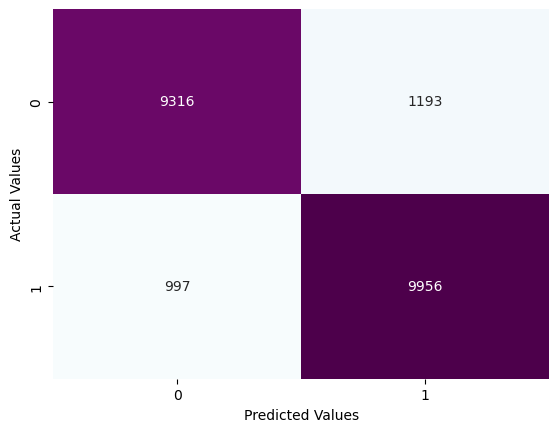

In [62]:
cfm=confusion_matrix(y_test,y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     10509
           1       0.89      0.91      0.90     10953

    accuracy                           0.90     21462
   macro avg       0.90      0.90      0.90     21462
weighted avg       0.90      0.90      0.90     21462



In [75]:
class Evaluation:
    
    def __init__(self,model,x_train,x_test,y_train,y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
    def train_evaluation(self):
        y_pred_train = self.model.predict(self.x_train)
        
        acc_scr_train = accuracy_score(self.y_train,y_pred_train)
        print("Accuracy Score On Training Data Set :",acc_scr_train)
        print()
        
        con_mat_train = confusion_matrix(self.y_train,y_pred_train)
        print("Confusion Matrix On Training Data Set :\n",con_mat_train)
        print()
        
        class_rep_train = classification_report(self.y_train,y_pred_train)
        print("Classification Report On Training Data Set :\n",class_rep_train)
        
        
    def test_evaluation(self):
        y_pred_test = self.model.predict(self.x_test)
        
        acc_scr_test = accuracy_score(self.y_test,y_pred_test)
        print("Accuracy Score On Testing Data Set :",acc_scr_test)
        print()
        
        con_mat_test = confusion_matrix(self.y_test,y_pred_test)
        print("Confusion Matrix On Testing Data Set :\n",con_mat_test)
        print()
        
        class_rep_test = classification_report(self.y_test,y_pred_test)
        print("Classification Report On Testing Data Set :\n",class_rep_test)

In [76]:
#Checking the accuracy on training dataset

Evaluation(rf,x_train, x_test, y_train, y_test).train_evaluation()

Accuracy Score On Training Data Set : 0.9997803295057414

Confusion Matrix On Training Data Set :
 [[24511     8]
 [    3 25553]]

Classification Report On Training Data Set :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24519
           1       1.00      1.00      1.00     25556

    accuracy                           1.00     50075
   macro avg       1.00      1.00      1.00     50075
weighted avg       1.00      1.00      1.00     50075



In [77]:
#Checking the accuracy on testing dataset
Evaluation(rf,x_train, x_test, y_train, y_test).test_evaluation()

Accuracy Score On Testing Data Set : 0.8979591836734694

Confusion Matrix On Testing Data Set :
 [[9316 1193]
 [ 997 9956]]

Classification Report On Testing Data Set :
               precision    recall  f1-score   support

           0       0.90      0.89      0.89     10509
           1       0.89      0.91      0.90     10953

    accuracy                           0.90     21462
   macro avg       0.90      0.90      0.90     21462
weighted avg       0.90      0.90      0.90     21462



# Prediction Pipeline

In [78]:
class Preprocessing:
    
    def __init__(self,data):
        self.data = data
        
    def text_preprocessing_user(self):
        lm = WordNetLemmatizer()
        pred_data = [self.data]    
        preprocess_data = []
        for data in pred_data:
            review = re.sub('^a-zA-Z0-9',' ', data)
            review = review.lower()
            review = review.split()
            review = [lm.lemmatize(x) for x in review if x not in stopwords]
            review = " ".join(review)
            preprocess_data.append(review)
        return preprocess_data    

In [79]:
df['title'][1]

'UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]'

In [80]:
data = 'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'
Preprocessing(data).text_preprocessing_user()

['flynn: hillary clinton, big woman campus - breitbart']

In [81]:
class Prediction:
    
    def __init__(self,pred_data, model):
        self.pred_data = pred_data
        self.model = model
        
    def prediction_model(self):
        preprocess_data = Preprocessing(self.pred_data).text_preprocessing_user()
        data = tf.transform(preprocess_data)
        prediction = self.model.predict(data)
        
        if prediction [0] == 0 :
            return "The News Is Fake"
        
        else:
            return "The News Is Real"

In [82]:
data = 'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'
Prediction(data,rf).prediction_model()

'The News Is Fake'

In [83]:
df['title'][3]

'SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice'

In [84]:
user_data = '15 Civilians Killed In Single US Airstrike Have Been Identified' 
Prediction(user_data,rf).prediction_model()

'The News Is Real'